# The Evolution of the 3-Point Shot in the NBA 
## Introduction
In 1980, the National Basketball Association (NBA) introduced the 3-point line. At the time it was not considered significant, however over time we have seen a drastic increase on the reliance of the three pointer, and today is considered an important part of any team's gameplan. Through their dominance in the mid to late 2010s, the Golden State Warriors have been recognized as having revolutionized the game and making the three pointer a must-have attribute. The logic is simple: a three-point shot is worth more than a 2-point shot, so if a team can make enough 3-point shots, this will outweigh the 2-pointers. However, there have been questions raised about the effectiveness of shooting many 3 pointers, and if it truly translates into a winnning strategy. 

In this analysis, I will evaluate the increase in three point shots taken since the introduction of the 3-point line, and how/if taking more three-pointers translates into more victories. Some questions that will be answered:

    - Does making/shooting more 3-pointers translate into more wins? 
    - How efficient (in terms of shot-making percentage) do you have to be to make a 3-pointer more valuable than a 2-pointer? 
    - How does the league compare now vs. 40 years ago? More scoring? Do better teams make more 3-pointers? 

##  Gathering Data 
All of the libraries needed for this tutorial to scrape, tidy and visualize the data are imported here. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn
from bs4 import BeautifulSoup
import requests

## Source for Data
I scraped data for each season since 1980 from [Basketball Reference](basketball-reference.com). Unfortunately, the tables there are not static, but fortunately they had an embedded link for the table, which I was able to use to scrape the tables I wanted! The tables were stored by season, so I just gathered each team's total stats for the season and looped through each link to get every season from 1980-2021 total stats for each team. 

I had to scrape two tables for each season, one with the total stats for each team, and the other for the win and losses. I merged the two tables after tidying up some data. Some teams had a `*` next to their names denoting that they were a playoff team. This changes every season so I had to remove this to ensure the team names aligned season by season. 




In [10]:
year = 1980
df = None 
# Function to remove asteriks from team name 
def remove_asteriks(df): 
    for i in df.index: 
        t = df.at[i, "Team"]
        if '*' in t: 
            df.at[i, 'Team'] = t[0:len(t)-1]
    return df

for year in range(1980, 2022):
    stats_url = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fleagues%2FNBA_{year}.html&div=div_team-stats-base'
    standings_url = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=bbr&url=%2Fleagues%2FNBA_{year}.html&div=div_misc_stats'
    if df is None: 
        df = pd.read_html(stats_url)[0]
        df['Season'] = year 
        win_loss = pd.read_html(standings_url)[0]
        win_loss.columns = win_loss.columns.droplevel(0)
        win_loss = remove_asteriks(win_loss)[['Team', 'W', 'L']]
        remove_asteriks(df)
        df = df.merge(win_loss, on='Team')
        
    else: 
        temp = pd.read_html(stats_url)[0]
        temp['Season'] = year 
        win_loss = pd.read_html(standings_url)[0]
        win_loss.columns = win_loss.columns.droplevel(0)
        win_loss = remove_asteriks(win_loss)[['Team', 'W', 'L']]
        remove_asteriks(temp)
        temp = temp.merge(win_loss, on='Team')
        df = pd.concat([df, temp])

df = df[['Team', 'G', 'W', 'L', 'FG', 'FGA', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'PTS', 'Season']]




## Data Exploration and Analysis 

After gathering and organizing the dataset, I first decided to visualize the growth of the three point shot over time. Below is a graph displaying the average number of shot attempts by team per season. I took each team's total shot attempts (both 2-point attempts and 3-point attempts), averaged the totals by each season and plotted each point by the year. What is obvious is a decrease in the number of 2-point attempts, but an increase in the number of 3-point attempts over time. The two datasets seem to converge over time, with some outliars. The outliars are attested to a shortened season with all teams playing a lower number of games than normal, for a variety of reasons.

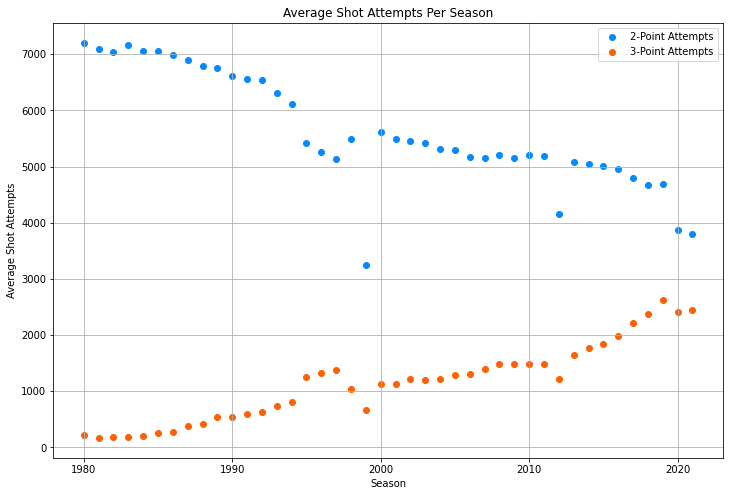

In [38]:
avg_attempts = df.groupby('Season').mean()
fig, ax = plt.subplots(figsize=(12,8))
x = avg_attempts.index
ax.scatter(x, avg_attempts['2PA'], c='#048aff', label='2-Point Attempts')
ax.scatter(x, avg_attempts['3PA'], c='#ff6004', label='3-Point Attempts')



ax.legend()
ax.grid(True)
plt.xlabel('Season')
plt.ylabel('Average Shot Attempts')
plt.title('Average Shot Attempts Per Season')
plt.show()

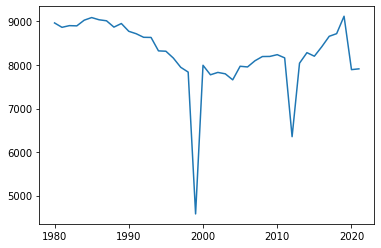